K means clustering

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [22]:
df = pd.read_csv(r'C:\Users\BATTULA TULASI RAO\Desktop\data science\Learning\techtable\StudentsPerformance.xls')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
Y = df.iloc[:, [5,6,7]].values
Y

array([[72, 72, 74],
       [69, 90, 88],
       [90, 95, 93],
       ...,
       [59, 71, 65],
       [68, 78, 77],
       [77, 86, 86]], dtype=int64)

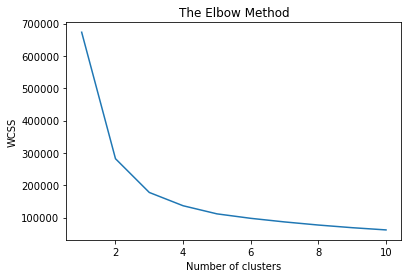

In [24]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(Y)

In [26]:
print(y_kmeans)

[2 1 1 0 1 1 1 0 2 0 0 0 2 2 0 2 1 0 0 0 2 2 0 2 2 2 2 2 2 2 2 2 2 0 1 1 1
 0 1 0 0 2 2 2 0 2 2 2 2 1 0 2 0 1 1 0 1 0 2 0 2 0 2 2 2 2 0 2 2 0 2 2 0 0
 0 0 0 1 2 2 0 0 0 2 0 1 1 2 2 1 2 0 2 0 1 1 2 2 2 2 2 2 1 0 1 2 1 2 2 2 1
 0 0 0 1 1 1 1 2 2 1 1 1 2 1 1 2 2 1 0 1 0 1 1 1 0 0 2 2 2 2 2 0 0 1 0 1 2
 2 1 2 2 2 0 2 1 2 2 1 2 1 1 0 0 1 1 0 2 1 2 2 1 1 2 0 1 0 2 2 1 2 2 0 2 0
 2 2 2 0 1 2 1 2 2 1 0 2 0 0 1 1 2 2 2 0 2 2 1 1 2 1 0 0 0 1 1 1 0 2 0 2 1
 2 1 2 0 2 0 2 1 2 0 1 1 1 1 2 2 0 1 2 1 0 0 2 1 1 2 2 2 0 1 2 1 0 2 2 1 2
 1 2 1 0 1 2 0 2 2 1 2 2 0 0 2 1 1 1 2 1 2 0 0 1 1 0 1 1 1 1 1 2 1 2 2 1 2
 0 2 0 1 1 0 1 2 1 2 1 0 2 0 1 2 2 2 2 2 1 1 2 2 1 1 1 0 0 1 2 0 1 0 2 0 0
 1 1 2 2 0 0 0 0 2 2 2 2 1 2 1 2 1 2 2 2 0 2 2 2 2 2 1 2 1 0 0 2 0 2 2 0 1
 1 2 2 1 2 0 1 1 1 2 1 1 1 0 0 2 2 2 2 2 2 2 2 0 2 0 2 1 2 0 2 0 0 1 2 2 2
 1 0 1 2 1 2 2 2 1 2 2 2 0 1 2 0 2 0 2 1 2 2 2 2 2 0 0 2 0 2 2 2 1 1 1 2 1
 1 2 2 1 0 1 1 1 2 0 2 0 1 0 1 2 0 0 2 1 2 1 0 2 1 1 1 2 1 2 1 1 2 2 2 2 2
 0 2 0 0 2 0 2 0 1 1 2 1 

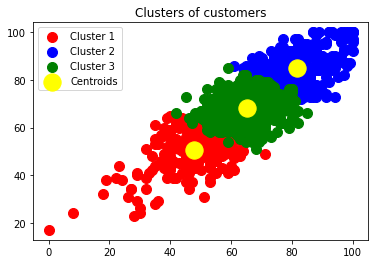

In [27]:
plt.scatter(Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Y[y_kmeans == 1, 0], Y[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Y[y_kmeans == 2, 0], Y[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.legend()
plt.show()

Hierarchical clustering

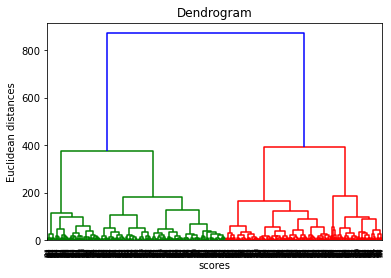

In [28]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(Y, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('scores')
plt.ylabel('Euclidean distances')
plt.show()

In [29]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(Y)

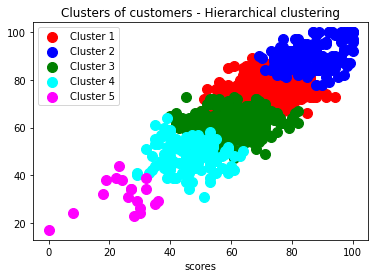

In [30]:
plt.scatter(Y[y_hc == 0, 0], Y[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Y[y_hc == 1, 0], Y[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Y[y_hc == 2, 0], Y[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Y[y_hc == 3, 0], Y[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(Y[y_hc == 4, 0], Y[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers - Hierarchical clustering')
plt.xlabel('scores')
plt.legend()
plt.show()

DBSCAN

In [31]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, metric='euclidean', min_samples=10)

In [32]:
dbscan.fit(Y)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [33]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [35]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(Y)
pca_2d = pca.transform(Y)
pca_2d

array([[ -8.48837536,   1.26411978],
       [-25.46144129, -13.73117695],
       [-43.12175323,  -0.35950596],
       ...,
       [  4.75467372,  -5.15605377],
       [-11.46651782,  -5.47790938],
       [-26.47680822,  -4.83322812]])

In [ ]:
plt.figure(figsize=(20,10))
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='r',marker='^')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='b',marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2','Noise'])
plt.show()

In [ ]:
df['gender']

In [ ]:
import seaborn as sns
x=sns.countplot('gender',data=df)

In [ ]:
y=sns.countplot('race/ethnicity',data=df)